# P2: Investigating a [Baseball] Dataset Using Numpy and Pandas### 

### Subhasree

# Background Info:

**What is a balk?** 

> In simple terms, a balk is when the pitcher tries to intentionally deceive the hitter or runner.  It can be a flinch on the mound after the pitcher gets set, a deceptive pick off attempt, or even just as simple as dropping the ball once you become set.  There are many actions that can result in a balk.  When runners are on base and a balk is called, all the runners move up one base.

**Balks are rare.** Since 2000, there have only been 100-200 balks per season, which is roughly one every 12 to 24 games (or 648 to 1296 innings pitched) in a full 2430-game season.

**Balks are difficult to spot.** Balks sometimes go unnoticed by fans, players, and umpires. What constitutes a balk might be subjective depending on the umpire. Balks might even be ignored by umpires depending on the situation.

**The definition of a balk has changed over time.** Throughout baseball history, there have been a number of tweaks to the balk rule. With each tweak, balk totals for the subsequent season tended to spike or dip.



# Investigation Questions:

1. How have balks trended throughout baseball history? Does the trend align with rule changes, rule enforcements, etc.?
2. The balk rule is designed to limit pitcher deception towards the baserunner. Did the balk rule changes and enforcements in the mid-to-late 1900s spark an increase in stolen base attempts?
3. Are there significantly more balks called per inning pitched in the regular season compared to the postseason? If yes, why might this be occurring?
4. Who is the all-time balk king? Who is the modern-day (post-2000) balk king? Who is the balk iron man (most innings pitched without a balk)?

# Dataset for Analysis:

The [full database](http://www.seanlahman.com/baseball-archive/statistics/) and a [detailed description](http://seanlahman.com/files/database/readme2014.txt) of its contents can be found on Sean Lahman's website.

# Data Wrangling
* Missing Data
* Merging Tables
* Modifying Data


# Analysis
## 1. Balk Trends Throughout History

How have balks trended throughout baseball history? Does the trend align with rule changes, rule enforcements, etc.?

In [9]:
import pandas as pd

# Loading the relevant .csv files into DataFrames
datamaster_df = pd.read_csv('../p2/baseballdatabank-master/core/Master.csv')
datapitching_df = pd.read_csv('../p2/baseballdatabank-master/core/Pitching.csv')
datapitchingpost_df = pd.read_csv('../p2/baseballdatabank-master/core/PitchingPost.csv')
databatting_df = pd.read_csv('../p2/baseballdatabank-master/core/Batting.csv')

Populating the interactive namespace from numpy and matplotlib


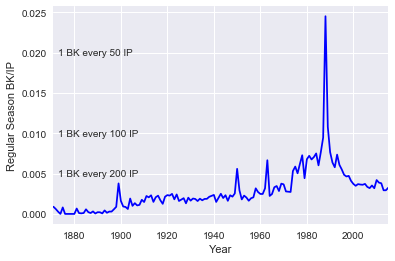

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

# Balks per inning pitched data grouped by year (regular season)
year_balks = datapitching_df.groupby('yearID')['BK'].sum()
year_ip = (datapitching_df.groupby('yearID')['IPouts'].sum()) / 3 # Convert to IP
balks_ip_by_year = year_balks / year_ip

figure = balks_ip_by_year.plot(color='b')
figure.annotate('1 BK every 50 IP', xy=(1873, .02), xytext=(1873, .0197))
figure.annotate('1 BK every 100 IP', xy=(1873, .01), xytext=(1873, .0097))
figure.annotate('1 BK every 200 IP', xy=(1873, .005), xytext=(1873, .0047))
ylabel('Regular Season BK/IP')
xlabel('Year')

Balks per inning pitched have been on a slow upward trajectory since 1885 or so, with spikes in 1899, 1950, 1963, and 1988. The spike in 1988 (1 balk for every ~40 innings pitched) was so dramatic that the season is referred to as [The Year of the Balk](http://www.baseball-reference.com/bullpen/Balk). All of these spikes coincide with rule changes and enforcements. As per [Recondite Baseball](http://reconditebaseball.blogspot.ca/2008/08/balks-story-of-1988-major-league.html):
- **1898/1899**: The first balk rule dealing with runners on base was inserted into the rule book in 1898. It stated a pitcher was compelled to throw to a base if he made a motion in that direction.  The following year, the balk rule was refined to say a pitcher could not fake a pickoff throw.
- **1950**: A new rule requiring a one-second stop before delivering a pitch with men on base was implemented in 1950.
- **1963**: The National League cracked down on balks ... for the 1963 season. An order to umpires to clamp down on balks resulted in twenty balks called in the first twenty games of the year.
- **1988 (The Year of the Balk)**: The 1988 version [of the rules] replaced “complete stop” with “single complete and discernible stop, with both feet on the ground.” This slight change, intended to make balk calls more uniform throughout major league baseball, instead sparked one of most frustrating summers ever for major league hurlers.

## 2. Balks & Stolen Base Attempts

The balk rule is designed to limit pitcher deception towards the baserunner. Did the balk rule changes and enforcements in the mid-to-late 1900s spark an increase in stolen base attempts?

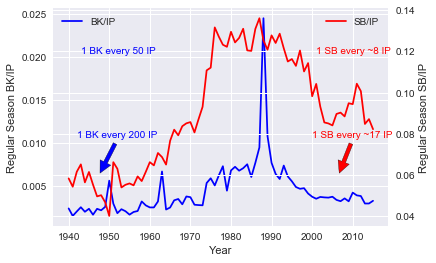

In [16]:
# Stolen base attempt data (successful + unsuccessful) grouped by year (regular season)
sb_by_year = batting_df.groupby('yearID')['SB'].sum()
cs_by_year = batting_df.groupby('yearID')['CS'].sum()
sb_attempts_by_year = sb_by_year + cs_by_year
sb_attempts_ip_by_year = sb_attempts_by_year / ip_by_year

x = balks_ip_by_year.loc['1940':'2015'].index.get_level_values('yearID')
y1 = balks_ip_by_year.loc['1940':'2015'].values
y2 = sb_attempts_ip_by_year.loc['1940':'2015'].values

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, color='b', label='BK/IP')
ax2.plot(x, y2, color='r', label='SB/IP')

ax1.legend(loc='upper left', shadow=True)
ax2.legend(loc='upper right', shadow=True)
ax1.set_xlabel('Year')
ax1.set_ylabel('Regular Season BK/IP')
ax2.set_ylabel('Regular Season SB/IP')
ax2.annotate('1 BK every 50 IP', xy=(1951, .12), xytext=(1943, .1188), color='blue')
ax2.annotate('1 BK every 200 IP', xy=(1947.5, .06), xytext=(1942, .078), color='blue',
             arrowprops=dict(facecolor='blue', shrink=0.05))
ax2.annotate('1 SB every ~8 IP', xy=(2000, .12), xytext=(2001, .1188), color='red')
ax2.annotate('1 SB every ~17 IP', xy=(2006.5, .06), xytext=(2000, .078), color='red',
             arrowprops=dict(facecolor='red', shrink=0.05))

The post-1950 balk rule changes and enforcements coincide with an increase in balks (blue) and an increase in stolen base attempts (red). Though there could be other factors at play here (i.e. an increase in player speed, managers calling for more stolen base attempts based on strategy change, etc.), it appears likely that the balk rule changes and modifications were effective in promoting the running game.

## 3. Regular Season Balks vs. Postseason Balks

Are there significantly more balks called per inning pitched in the regular season compared to the postseason? If yes, why might this be occurring?

### 3.1 Visual Trend

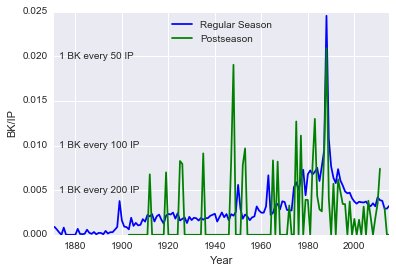

In [13]:
# Balks per inning pitched data grouped by year (postseason)
playoff_balks_by_year = pitchingpost_df.groupby('yearID')['BK'].sum()
playoff_ip_by_year = (pitchingpost_df.groupby('yearID')['IPouts'].sum()) / 3 # Convert to IP
playoff_balks_ip_by_year = playoff_balks_by_year / playoff_ip_by_year

fig = balks_ip_by_year.plot(color='b', label='Regular Season')
fig = playoff_balks_ip_by_year.plot(color='g', label='Postseason')
fig.legend(loc='upper center', shadow=True)
ylabel('BK/IP')
xlabel('Year')
fig.annotate('1 BK every 50 IP', xy=(1873, .02), xytext=(1873, .0197))
fig.annotate('1 BK every 100 IP', xy=(1873, .01), xytext=(1873, .0097))
fig.annotate('1 BK every 200 IP', xy=(1873, .005), xytext=(1873, .0047))

There is a high variation in postseason balks per inning pitched (green). This variation is to be expected because of the small sample size of innings pitched in each postseason. For reference, there are ~28 thousand innings pitched in the postseason pitching table compared to ~3.75 million in the regular season pitching table. Despite quick mean calculations in Excel revealing that regular season BK/IP is much larger than postseason BK/IP, it is difficult to determine purely from this yearly visualization which is the larger overall value.

### 3.2 Hypothesis Test

Question: Are there significantly more balks called per inning pitched in the regular season compared to the postseason?

H<sub>0</sub>: μ<sub>D, regular season BK/IP - postseason BK/IP</sub> <= 0

H<sub>A</sub>: μ<sub>D, regular season BK/IP - postseason BK/IP</sub> > 0

where H<sub>0</sub> is the null hypothesis, H<sub>A</sub> is the alternative hypothesis, and μ<sub>D, regular season BK/IP - postseason BK/IP</sub> is the population mean difference in balks per inning pitched for the regular season compared to the postseason.

A right-tailed, independent t-test comparing two independent means is appropriate for this scenario for the following reasons:
- Mean regular season BK/IP and mean postseason BK/IP are random samples from two independent populations. These means are considered samples because The Lahman Baseball Database does not have data for all of history and there is some missing data for the years the database does cover. Regular season and postseason data are not dependent on one another, assuming there is no significant relation between the pitchers that advance to the postseason and the pitchers that commit an extremely high or low amount of balks.
- Population standard deviation is unknown.
- Assumption: the BK/IP data is approximately normal. This assumption is not as important since the sample size of innings pitched is so large (~3.75 million innings pitched in the regular season pitching table and ~28 thousand in the postseason pitching table) and the Central Limit Theorem can be invoked.

Since the variances are not roughly equal, as illustrated by the above figure, unpooled standard error is appropriate for this test.

In [14]:
# Regular season balk and innings pitched data by year and individual
season_balks = pitching_df['BK']
season_ip = pitching_df['IPouts'] / 3 # Convert to IP
season_balks_ip = season_balks / season_ip
season_ip_sum = season_ip.sum()

# Weighted BK/IP mean calculation for regular season
season_ip_weights = season_ip / season_ip_sum
season_weight_times_obs = season_ip_weights * season_balks_ip
weighted_season_mean = season_weight_times_obs.sum() / season_ip_weights.sum()

# Weighted BK/IP standard deviation calculation for regular season
# stats.stackexchange: How do I calculate a weighted standard deviation? http://goo.gl/6206Ck
# Very large sample size (>3 million), so don't need to re-scale the variance before sqrt
sum_season_weighted_squared_dev = (season_ip_weights * ((season_balks_ip - weighted_season_mean) ** 2)).sum()
weighted_season_std  = (sum_season_weighted_squared_dev / season_ip_weights.sum()) ** 0.5

# Sample size for hypothesis test (regular season)
season_n = season_ip_sum

# Postseason balk and innings pitched data by year and individual (excluding NaNs)
playoff_balk_bool = pd.notnull(pitchingpost_df['BK']) # Exclude missing postseason BK data
playoff_balks = pitchingpost_df['BK'][playoff_balk_bool]
playoff_ip = (pitchingpost_df['IPouts'] / 3)[playoff_balk_bool] # Convert to IP
playoff_balks_ip = playoff_balks / playoff_ip
playoff_ip_sum = playoff_ip.sum()

# Weighted BK/IP mean calculation for postseason
playoff_ip_weights = playoff_ip / playoff_ip_sum
playoff_weight_times_obs = playoff_ip_weights * playoff_balks_ip
weighted_playoff_mean = playoff_weight_times_obs.sum() / playoff_ip_weights.sum()

# Weighted BK/IP standard deviation calculation for postseason
# stats.stackexchange: How do I calculate a weighted standard deviation? http://goo.gl/6206Ck
# Very large sample size (>27 thousand), so don't need to re-scale the variance before sqrt
sum_playoff_weighted_squared_dev = (playoff_ip_weights * ((playoff_balks_ip - weighted_playoff_mean) ** 2)).sum()
weighted_playoff_std  = (sum_playoff_weighted_squared_dev / playoff_ip_weights.sum()) ** 0.5

# Sample size for hypothesis test (postseason)
playoff_n = playoff_ip_sum

# For unpooled_se, t, and df formulas, see https://onlinecourses.science.psu.edu/stat200/node/60
# Unpooled standard error
unpooled_se = (((weighted_season_std ** 2) / season_n) + ((weighted_playoff_std ** 2) / playoff_n)) ** (0.5)

# Test statistic for independent means (unpooled)
t = (weighted_season_mean - weighted_playoff_mean) / unpooled_se

# Degrees of freedom for independent means (unpooled)
num_df = (((weighted_season_std ** 2) / season_n) + ((weighted_playoff_std ** 2) / playoff_n)) ** 2
denom_df = ((1 / (season_n - 1.)) * (((weighted_season_std ** 2) / season_n) ** 2)) + \
            ((1 / (playoff_n - 1.)) * (((weighted_playoff_std ** 2) / playoff_n) ** 2))
df = num_df / denom_df

# p-value
p = 0 # P(T > 5.50) using https://surfstat.anu.edu.au/surfstat-home/tables/t.php

print "Regular Season"
print "Weighted Season mean (BK/IP): " + str(weighted_season_mean)
print "Weighted Season std (BK/IP): " + str(weighted_season_std)
print "Season n (IP): " + str(season_n) + "\n"

print "Postseason"
print "Weighted playoff mean (BK/IP): " + str(weighted_playoff_mean)
print "Weighted playoff std (BK/IP): " + str(weighted_playoff_std)
print "Playoff n (IP): " + str(playoff_n) + "\n"

print "Unpooled SE: " + str(unpooled_se)
print "t: " + str(t)
print "df: " + str(df) # Calculation confirmed here http://web.utk.edu/~cwiek/TwoSampleDoF
print "p-value: " + str(p)

Regular Season
Weighted Season mean (BK/IP): 0.00356572754435
Weighted Season std (BK/IP): 0.00945781564073
Season n (IP): 3761644.66667

Postseason
Weighted playoff mean (BK/IP): 0.00256125009702
Weighted playoff std (BK/IP): 0.0292809931418
Playoff n (IP): 25768.6666667

Unpooled SE: 0.000182471469219
t: 5.50484660225
df: 25804.5120818
p-value: 0


There is sufficient evidence at *any* alpha level of significance to support the claim that there are significantly more balks called per inning pitched in the regular season compared to the postseason.

So why was there **1 balk called every 280 innings in the regular season** and only **1 balk called every 390 innings in the postseason**? My speculation is that a combination of the two factors below is responsible for the discrepancy:
- Umpires "[swallow the whistle](http://www.cnn.com/2011/OPINION/02/05/moskowitz.wertheim.super.bowl/)" in the postseason and tend to make fewer controversial calls. Balks are somewhat of a grey area and perhaps umpires are more conservative when the stakes are high in playoff games. From the linked article, "psychologists have found that people view inaction as less causal, less blameworthy and less harmful than action."
- Pitchers are more careful to not commit a balk when the stakes are high, as is the case in the postseason. The 162-game regular season is a marathon and it is likely difficult to maintain a consistently high level of focus throughout. Perhaps pitchers consciously apply a higher level of focus in the playoffs with regards to balks.

## 4. Balk Kings & Iron Men

Who is the all-time balk king? Who is the modern-day (post-2000) balk king? Who is the balk iron man (most innings pitched without a balk)?

In [15]:
# Balks and innings pitched data grouped by player (regular season)
balks_by_pitcher = pitching_df.groupby('playerID')['BK'].sum()
ip_by_pitcher = (pitching_df.groupby('playerID')['IPouts'].sum()) / 3 # Convert to IP
ip_by_pitcher.rename('IP', inplace=True)

# Innings pitched for every balk column
ip_balks_by_pitcher = ip_by_pitcher / balks_by_pitcher
ip_balks_by_pitcher.rename('IP/BK', inplace=True)

# Combine master and pitching tables
player_info = master_df[['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame']]
alltime_balk_king = player_info.join(ip_by_pitcher, on='playerID', how='inner')
alltime_balk_king = alltime_balk_king.join(balks_by_pitcher, on='playerID', how='inner')
alltime_balk_king = alltime_balk_king.join(ip_balks_by_pitcher, on='playerID', how='inner') \
                                           .sort_values('IP/BK', ascending=True)

# Record holders
alltime_balk_king = alltime_balk_king.loc[alltime_balk_king['IP'] > 50]
modern_balk_king = alltime_balk_king.loc[alltime_balk_king['debut'] > '2000-01-01']
balk_iron_man = alltime_balk_king.loc[(alltime_balk_king['BK'] == 0) & \
                                      (alltime_balk_king['debut'] > '1950-01-01')] \
                                      .sort_values('IP', ascending=False)

In [16]:
alltime_balk_king.head(15)

,playerID,nameFirst,nameLast,debut,finalGame,IP,BK,IP/BK
7298,heinkdo01,Don,Heinkel,1988-04-07,1989-05-18,62.666667,7,8.952381
14706,rowedo01,Don,Rowe,1963-04-09,1963-07-18,54.666667,5,10.933333
10492,manzara01,Ravelo,Manzanillo,1988-09-25,1995-05-09,63.000000,5,12.600000
7227,haywara01,Ray,Hayward,1986-09-20,1988-07-05,78.666667,5,15.733333
6317,gonzage01,German,Gonzalez,1988-08-05,1989-09-25,50.333333,3,16.777778
5519,fortuti01,Tim,Fortugno,1992-07-20,1995-07-26,110.333333,6,18.388889
8357,jimenge01,German,Jimenez,1988-06-28,1988-10-01,55.666667,3,18.555556
8911,kentst01,Steven,Kent,2002-04-04,2002-09-22,57.333333,3,19.111111
10783,mayayu01,Yunesky,Maya,2010-09-07,2013-05-21,59.000000,3,19.666667
17750,waltege01,Gene,Walter,1985-08-09,1988-09-30,182.666667,9,20.296296


For pitchers with more than 50 innings pitched, [Don Heinkel](https://en.wikipedia.org/wiki/Don_Heinkel) is the all-time IP/BK leader with 1 balk every ~9 innings pitched (7 balks in 62 and 2/3 innings). Heinkel, like many of the pitchers on this leaderboard, pitched in the era influenced by 1988, The Year of the Balk, so perhaps he doesn't deserve the Balk King title based on true "skill" alone.

In [17]:
modern_balk_king.head(15)

,playerID,nameFirst,nameLast,debut,finalGame,IP,BK,IP/BK
8911,kentst01,Steven,Kent,2002-04-04,2002-09-22,57.333333,3,19.111111
10783,mayayu01,Yunesky,Maya,2010-09-07,2013-05-21,59.000000,3,19.666667
14022,reedev01,Evan,Reed,2013-05-16,2014-09-19,55.666667,2,27.833333
152,albural01,Al,Alburquerque,2011-04-15,2015-09-29,225.000000,8,28.125000
11821,moralfr01,Franklin,Morales,2007-08-18,2015-10-04,486.000000,17,28.588235
12321,neugeni01,Nick,Neugebauer,2001-08-19,2002-09-25,61.333333,2,30.666667
2175,burgoam01,Ambiorix,Burgos,2005-04-23,2007-05-26,160.333333,5,32.066667
368,andrima01,Matt,Andriese,2015-04-10,2015-10-04,65.666667,2,32.833333
4983,escaled01,Edgmer,Escalona,2010-09-10,2013-08-18,100.000000,3,33.333333
13362,phelptr01,Travis,Phelps,2001-04-19,2004-09-11,105.666667,3,35.222222


For pitchers with more than 50 innings pitched in the post-2000 era (after balk rates normalized following the 1988 rule change), [Steven Kent](https://goo.gl/p9olv5) is the modern-day IP/BK leader with 1 balk every ~19 innings pitched (3 balks in 57 and 1/3 innings). Kent pitched in the 2002 season. Perhaps the more interesting name on this list is [Franklin Morales](https://en.wikipedia.org/wiki/Franklin_Morales). Morales, still active in 2016, has committed an astounding 17 balks in 486 innings, which equates to 1 balk every ~29 innings. His sample size of 486 innings pitched is more than double anyone else's on the leaderboard. For me, Franklin Morales is the modern-day balk king.




In [18]:
balk_iron_man.head(15)

,playerID,nameFirst,nameLast,debut,finalGame,IP,BK,IP/BK
14750,rueteki01,Kirk,Rueter,1993-07-07,2005-07-29,1918.000000,0,inf
8591,jonessa02,Sam,Jones,1951-09-22,1964-10-03,1643.333333,0,inf
11612,miltoer01,Eric,Milton,1998-04-05,2009-06-27,1582.333333,0,inf
9534,larsedo01,Don,Larsen,1953-04-18,1967-07-07,1548.000000,0,inf
1839,breweto01,Tom,Brewer,1954-04-18,1961-09-27,1509.333333,0,inf
6857,halldi01,Dick,Hall,1952-04-15,1971-09-25,1259.666667,0,inf
9863,lindbpa01,Paul,Lindblad,1965-09-15,1978-10-01,1213.666667,0,inf
1301,billich01,Chad,Billingsley,2006-06-15,2015-07-18,1212.333333,0,inf
10901,mccatst01,Steve,McCatty,1977-09-17,1985-09-25,1188.333333,0,inf
17161,travebi01,Bill,Travers,1974-05-19,1983-07-17,1120.666667,0,inf


[Kirk "Woody" Rueter](https://en.wikipedia.org/wiki/Kirk_Rueter) is the all-time innings pitched leader without a balk. Rueter pitched 1918 balk-less innings over a career that spanned 13 years, ~275 more innings than the second-place [Sam Jones](https://goo.gl/GLWLlH). Perhaps even more impressive is the fact that Rueter began his career in 1993, when balk-calling rates had not yet settled down from the highs caused by the rule change in 1988, i.e., The Year of the Balk. [Jonathan Niese](https://en.wikipedia.org/wiki/Jon_Niese) is probably the active pitcher on this leaderboard that has the best shot at catching Rueter. Niese is only 29 years old and is still a starting pitcher that logs ~150-200 innings per year. It would take Niese ~4.5 more balk-less years at his current pace to take the title of Balk Iron Man away from Rueter.